# Import libraries

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load Data 

In [184]:
path = r"D:\Gemy Study\Programming\Projects\DEBI_Project\Final_Project\heart.csv"
df = pd.read_csv(path)
df.sample(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
889,59.0,M,TA,134,204.0,0,Normal,162,N,0.8,Up,1
646,66.0,M,ASY,160,228.0,0,LVH,138,N,2.3,Up,0
481,69.0,M,NAP,140,0.0,1,ST,118,N,2.5,Down,1
612,55.0,M,ASY,122,223.0,1,ST,100,N,0.0,Flat,1
594,58.0,M,ASY,160,256.0,1,LVH,113,Y,1.0,Up,1
897,55.0,F,ASY,128,205.0,0,ST,130,Y,2.0,Flat,1
486,55.0,M,ATA,110,214.0,1,ST,180,N,0.4,Up,0
340,43.0,M,ASY,100,0.0,1,Normal,122,N,1.5,Down,1
517,65.0,M,ASY,150,235.0,0,Normal,120,Y,1.5,Flat,1
555,58.0,M,NAP,150,219.0,0,ST,118,Y,0.0,Flat,1


# **Data Cleaning & Exploratory Data Analysis (EDA)**


In [185]:
df.shape

(918, 12)

In [186]:
df.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             869 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     839 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,869.0,53.668585,10.771108,10.0,47.0,54.0,60.0,150.0
RestingBP,918.0,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,839.0,201.699642,109.517167,0.0,177.0,223.0,268.0,700.0
FastingBS,918.0,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.0,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.0,1.0,1.0,1.0


In [189]:
df.describe(include='object').T

,count,unique,top,freq
Sex,918,4,M,712
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [190]:
df.duplicated().sum()

np.int64(0)

In [191]:
df.isnull().sum()

Age               49
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol       79
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

In [192]:
missing_percentage = df.isnull().sum()/df.shape[0]*100
missing_percentage

Age               5.337691
Sex               0.000000
ChestPainType     0.000000
RestingBP         0.000000
Cholesterol       8.605664
FastingBS         0.000000
RestingECG        0.000000
MaxHR             0.000000
ExerciseAngina    0.000000
Oldpeak           0.000000
ST_Slope          0.000000
HeartDisease      0.000000
dtype: float64

In [193]:
df1 = df.copy()

In [194]:
numeric_col = df1[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].columns
num_imp = SimpleImputer(strategy='mean')
df1[numeric_col] = num_imp.fit_transform(df1[numeric_col])

In [195]:
df1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

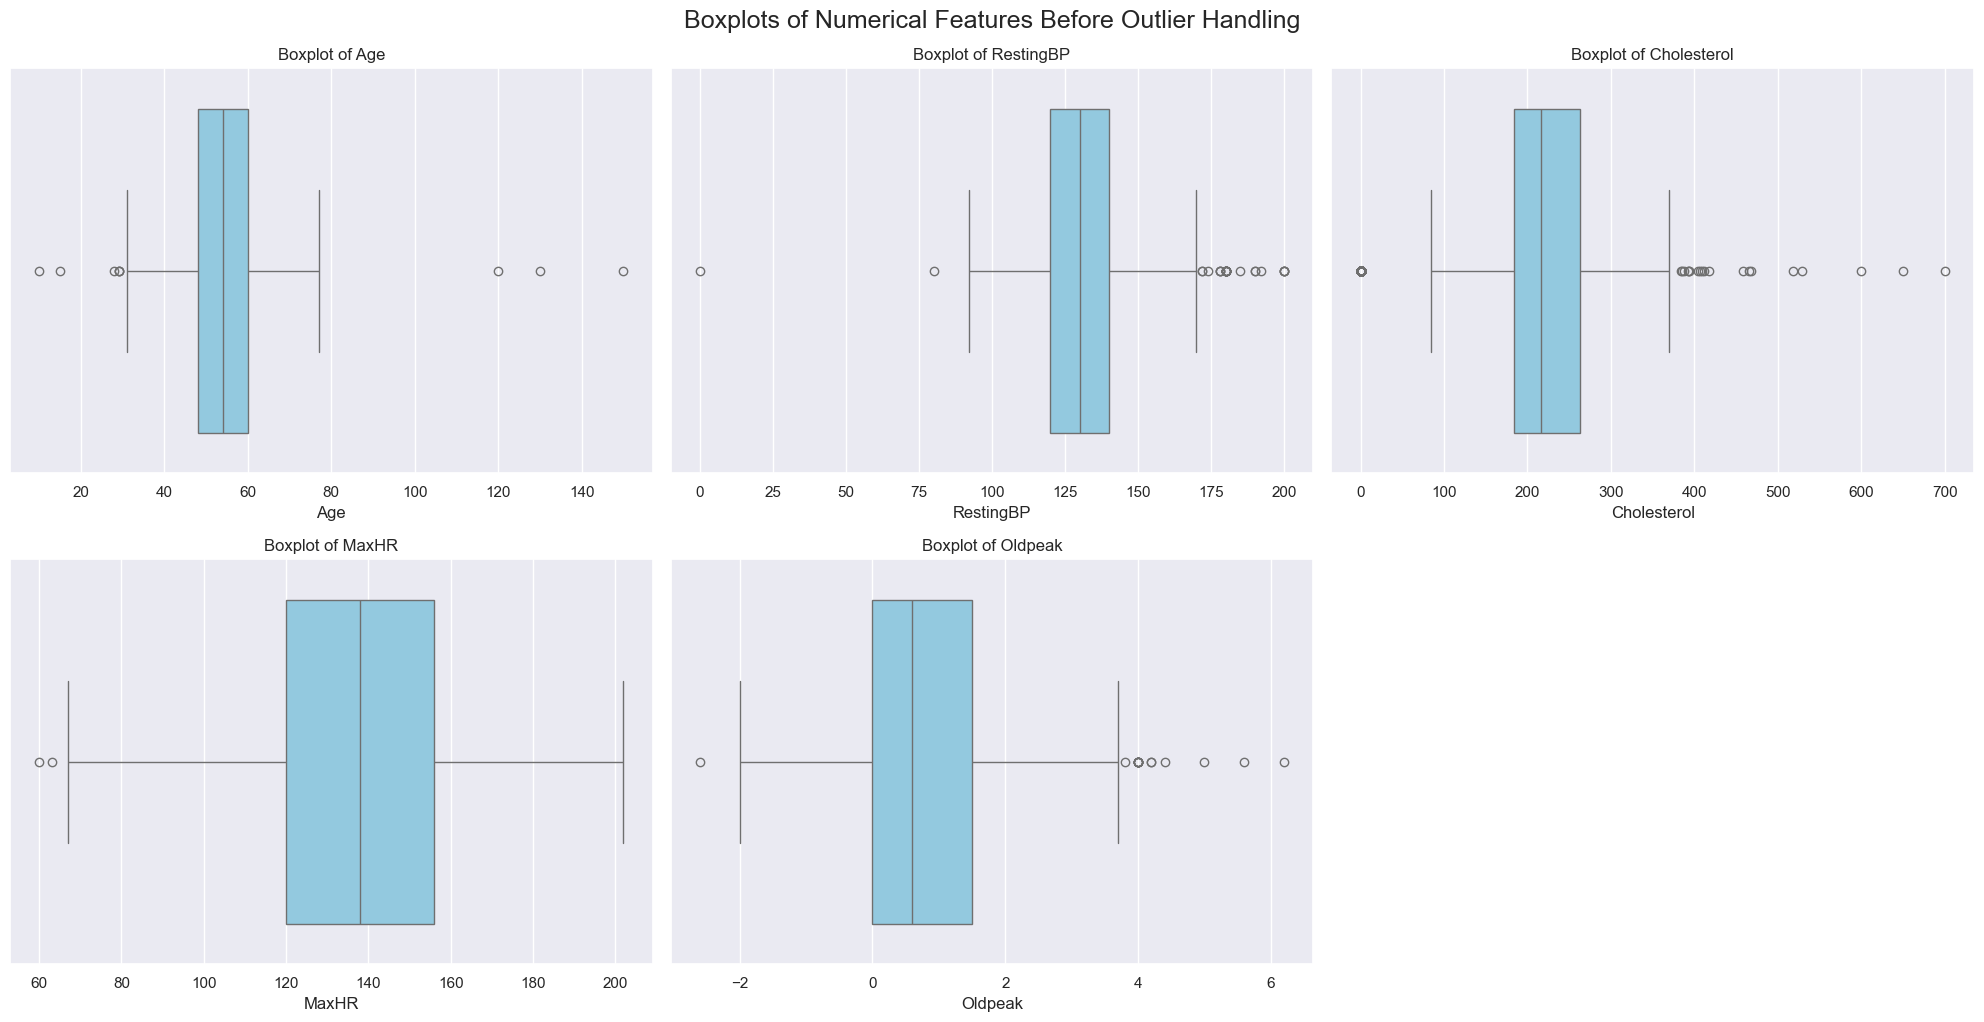

In [196]:
# This creates a boxplot for each numerical column in the DataFrame.
# The boxplot visually represents the distribution of the data.
plt.figure(figsize=(20, 10))

for i, col in enumerate(numeric_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df1[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features Before Outlier Handling', fontsize=18, y=1.02)
plt.show()

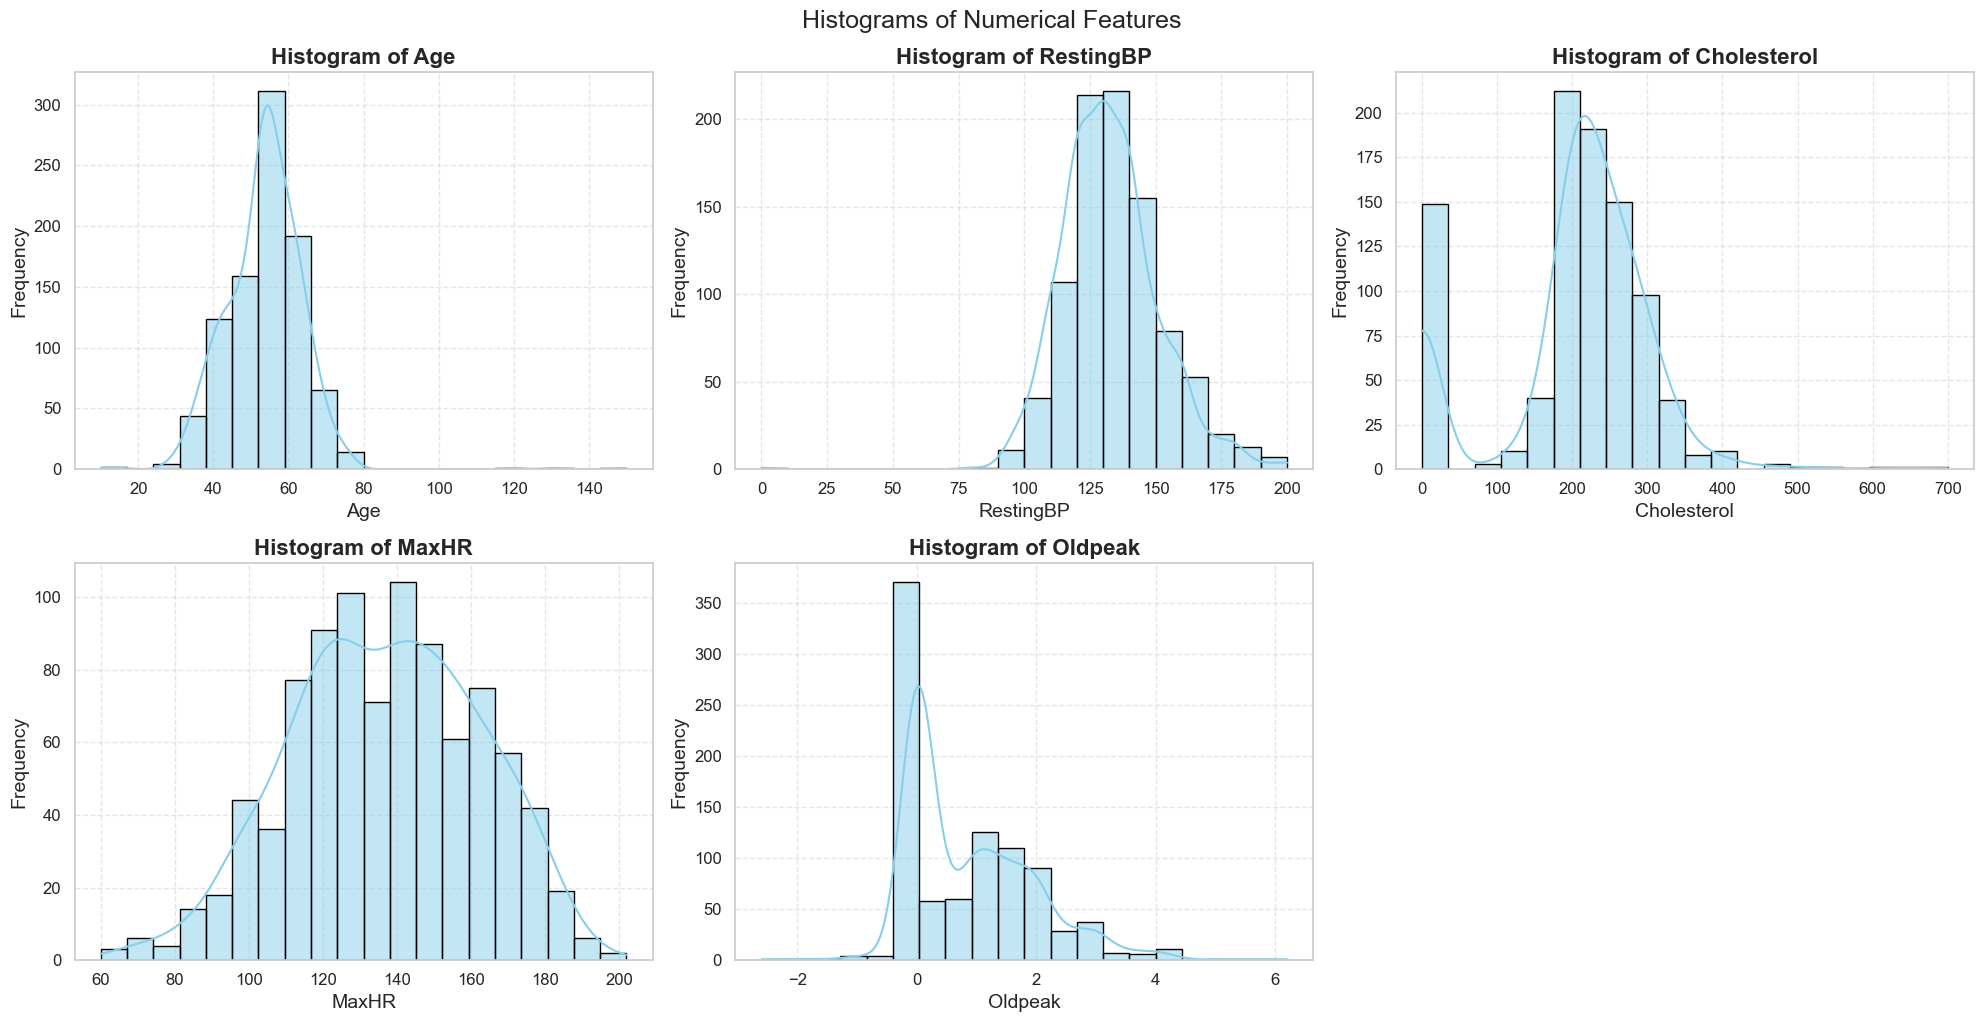

In [197]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))
for i,col in enumerate (numeric_col):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df1, x=col, bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', fontsize=18, y=1.02)
plt.show()

In [198]:
# Apply IQR method to detect outliers in the numerical column.
# Calculate the lower and upper bounds only once to optimize performance.
Q1 = df1[numeric_col].quantile(0.25)
Q3 = df1[numeric_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = ((df1[numeric_col] < lower_bound) | (df1[numeric_col] > upper_bound)).any(axis=1)
outliers = df1[outlier_mask]
outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53.0,F,ATA,113.0,468.0,0,Normal,127.0,N,0.0,Up,0
30,53.0,M,NAP,145.0,518.0,0,Normal,130.0,N,0.0,Flat,1
68,52.0,M,ASY,160.0,246.0,0,ST,82.0,Y,4.0,Flat,1
69,44.0,M,ASY,150.0,412.0,0,Normal,170.0,N,0.0,Up,0
76,32.0,M,ASY,118.0,529.0,0,Normal,130.0,N,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
850,62.0,F,ASY,160.0,164.0,0,LVH,145.0,N,6.2,Down,1
855,68.0,M,NAP,180.0,274.0,1,LVH,150.0,Y,1.6,Flat,1
880,52.0,M,NAP,172.0,199.0,1,Normal,162.0,N,0.5,Up,0
900,58.0,M,ASY,114.0,318.0,0,ST,140.0,N,4.4,Down,1


In [199]:
# Replace outliers with median
for col in numeric_col:
    median = df1[col].median()
    df1.loc[(df1[col] < lower_bound[col]) | (df1[col] > upper_bound[col]), col] = median

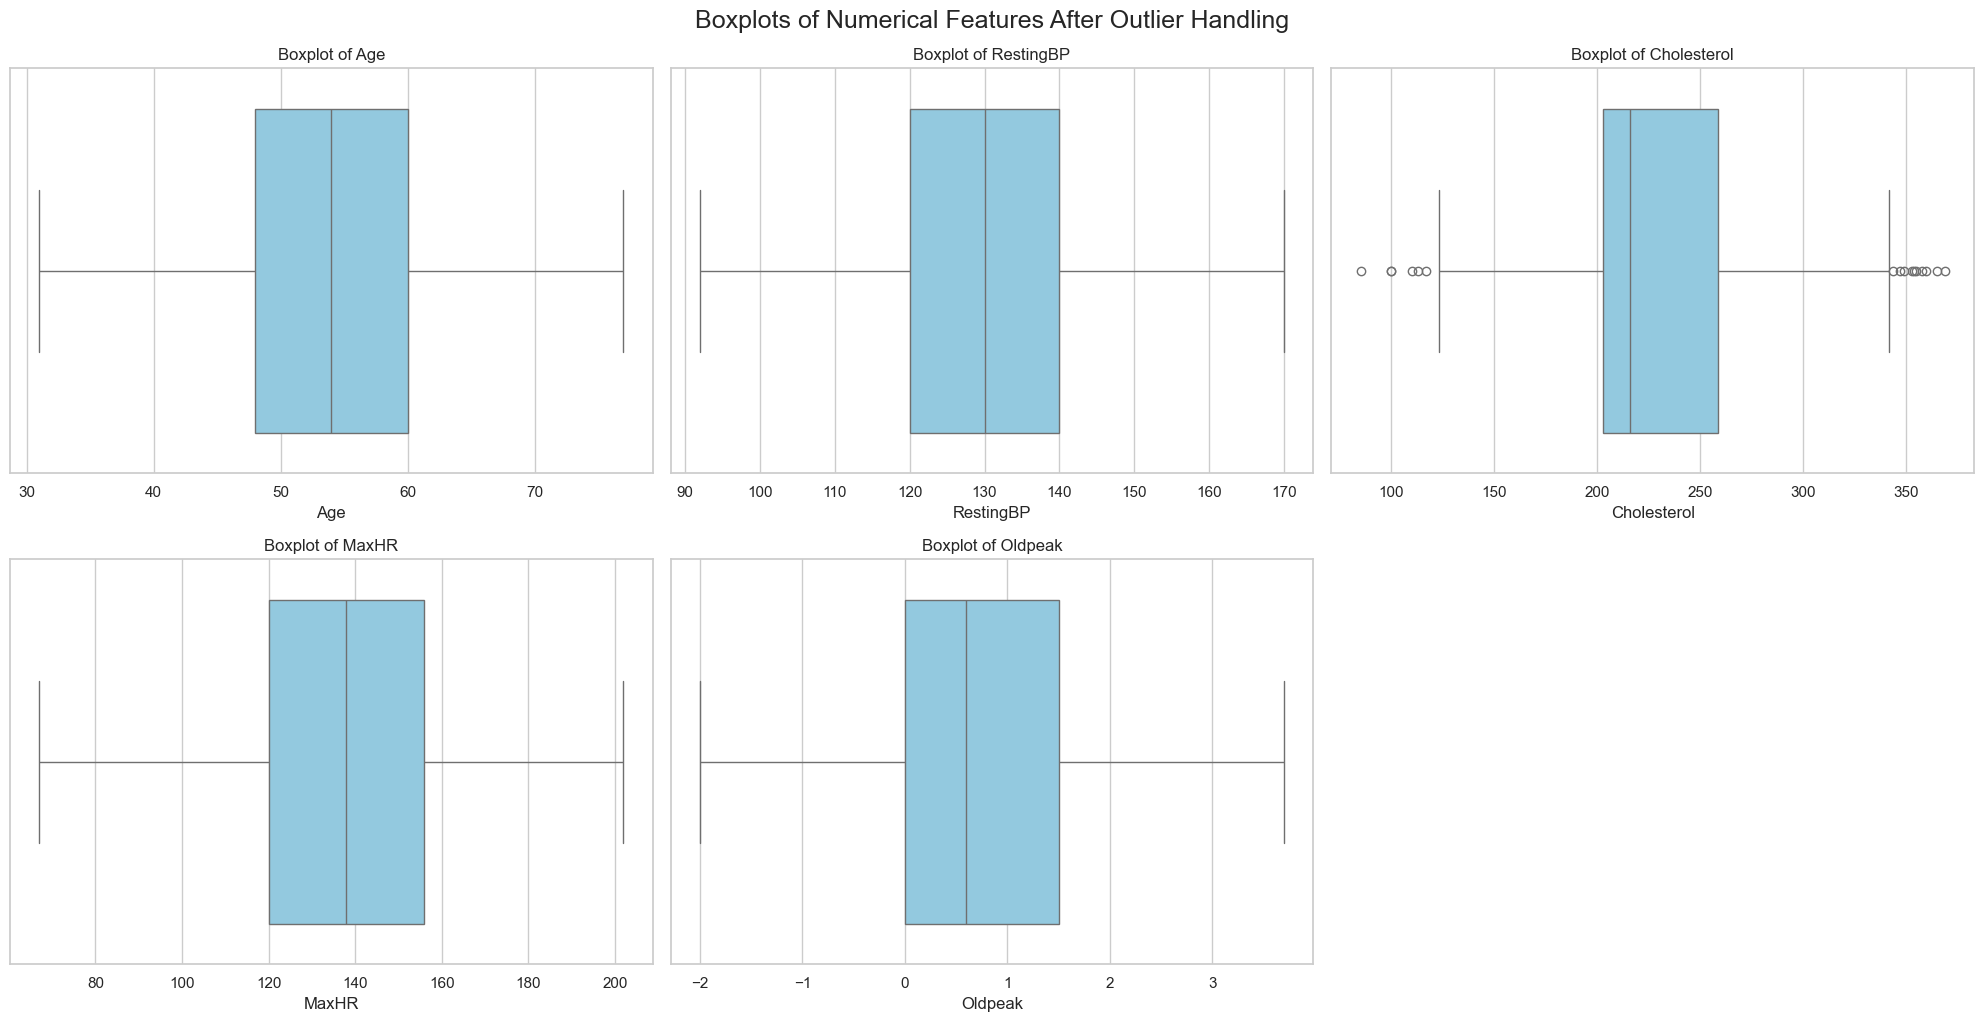

In [200]:
plt.figure(figsize=(20, 10))

for i, col in enumerate(numeric_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df1[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features After Outlier Handling', fontsize=18, y=1.02)
plt.show()

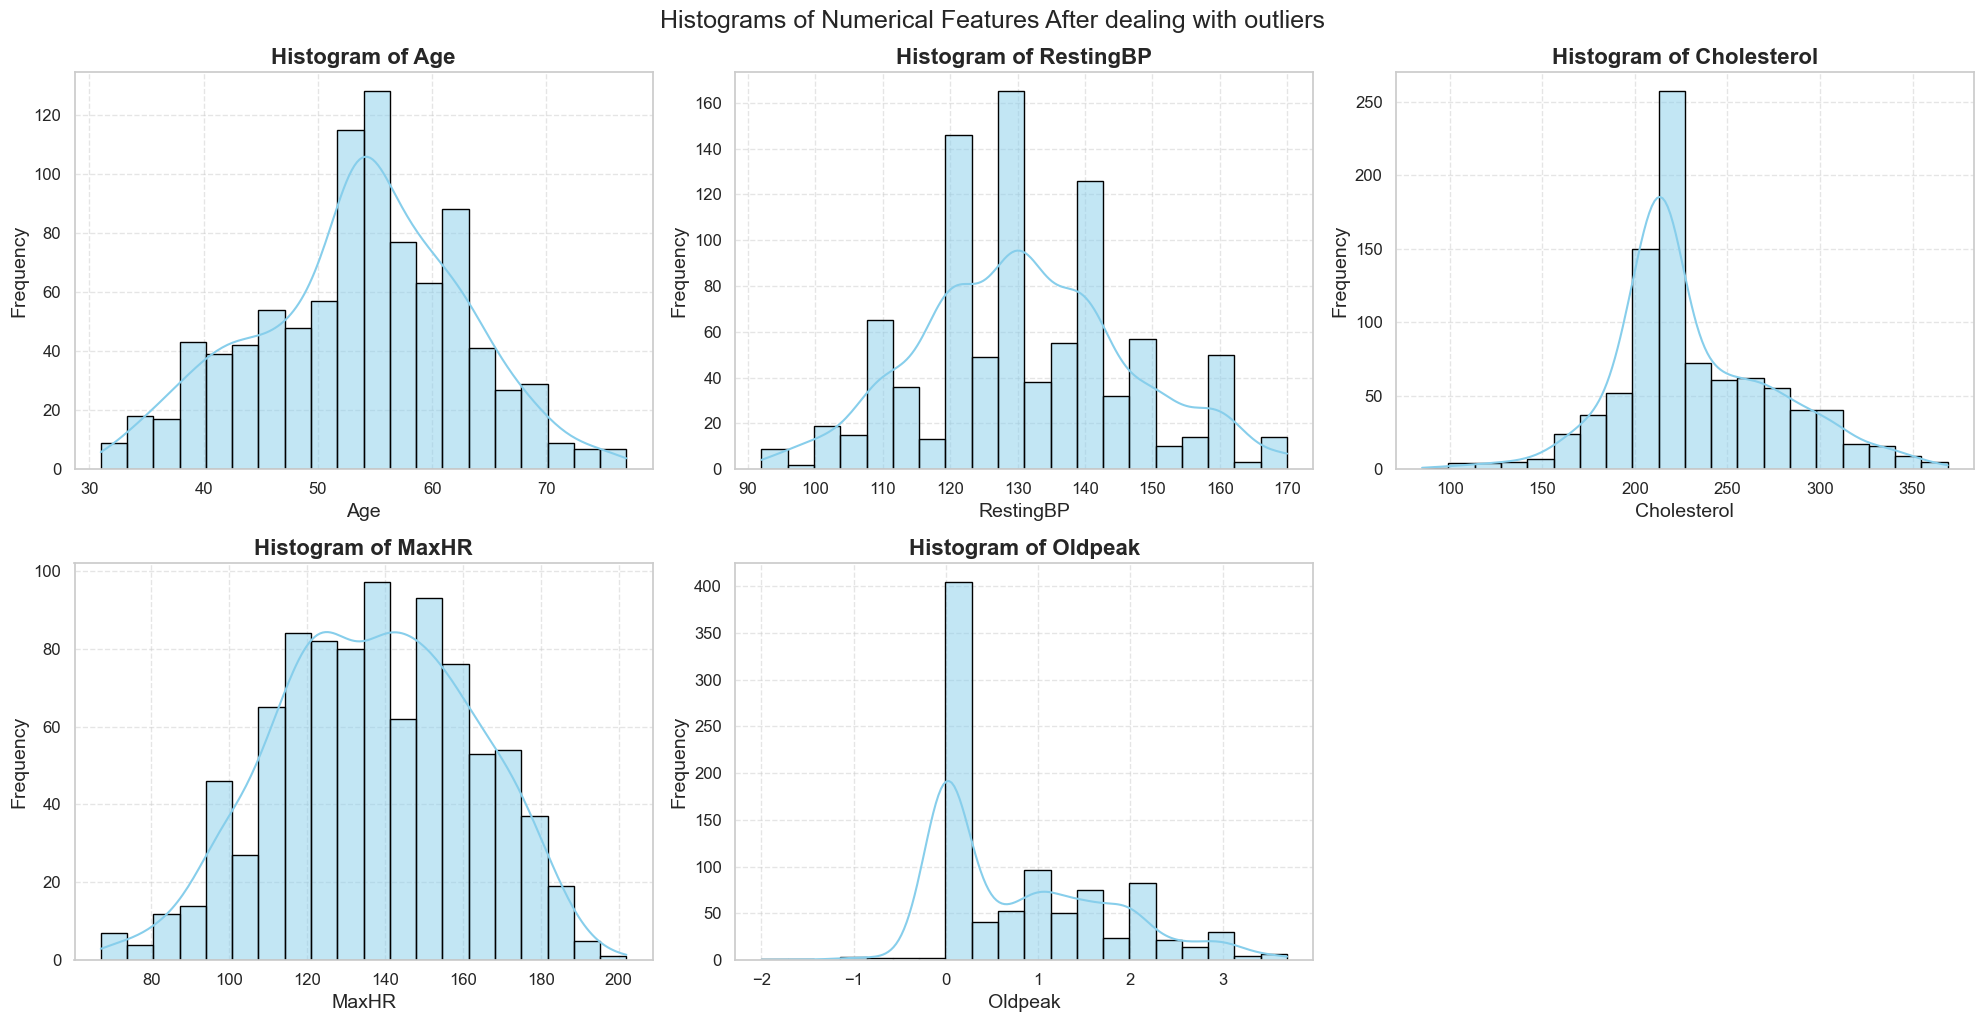

In [201]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))
for i,col in enumerate (numeric_col):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df1, x=col, bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle('Histograms of Numerical Features After dealing with outliers', fontsize=18, y=1.02)
plt.show()

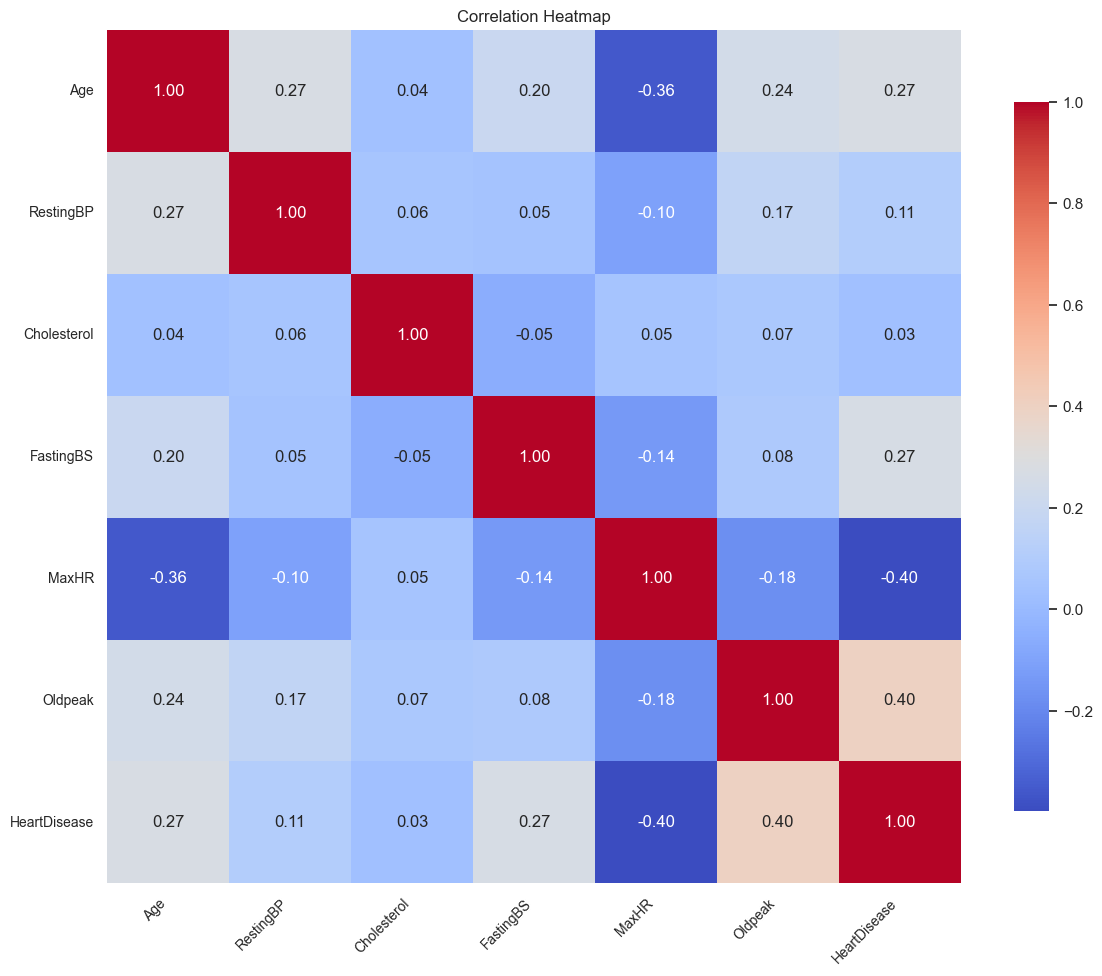

In [202]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [203]:
categorical_col = df1.select_dtypes(include=['object']).columns
categorical_col

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [204]:
# This loop prints all unique values for each categorical column.
# Useful for understanding the variety of labels in each column,
# identifying typos, inconsistencies, or values that need encoding.
# this help us also to know if there any Spelling or typing errors in the data
for col in categorical_col:
  print(f'{col}',df1[col].unique())
  print('------------------------------')

Sex ['M' 'F' 'Unknown' 'X']
------------------------------
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
------------------------------
RestingECG ['Normal' 'ST' 'LVH']
------------------------------
ExerciseAngina ['N' 'Y']
------------------------------
ST_Slope ['Up' 'Flat' 'Down']
------------------------------


In [205]:
df1["Sex"].value_counts()

Sex
M          712
F          191
Unknown     10
X            5
Name: count, dtype: int64

In [206]:
df1 = df1[~df1["Sex"].isin(['X', 'Unknown'])]

In [207]:
df1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

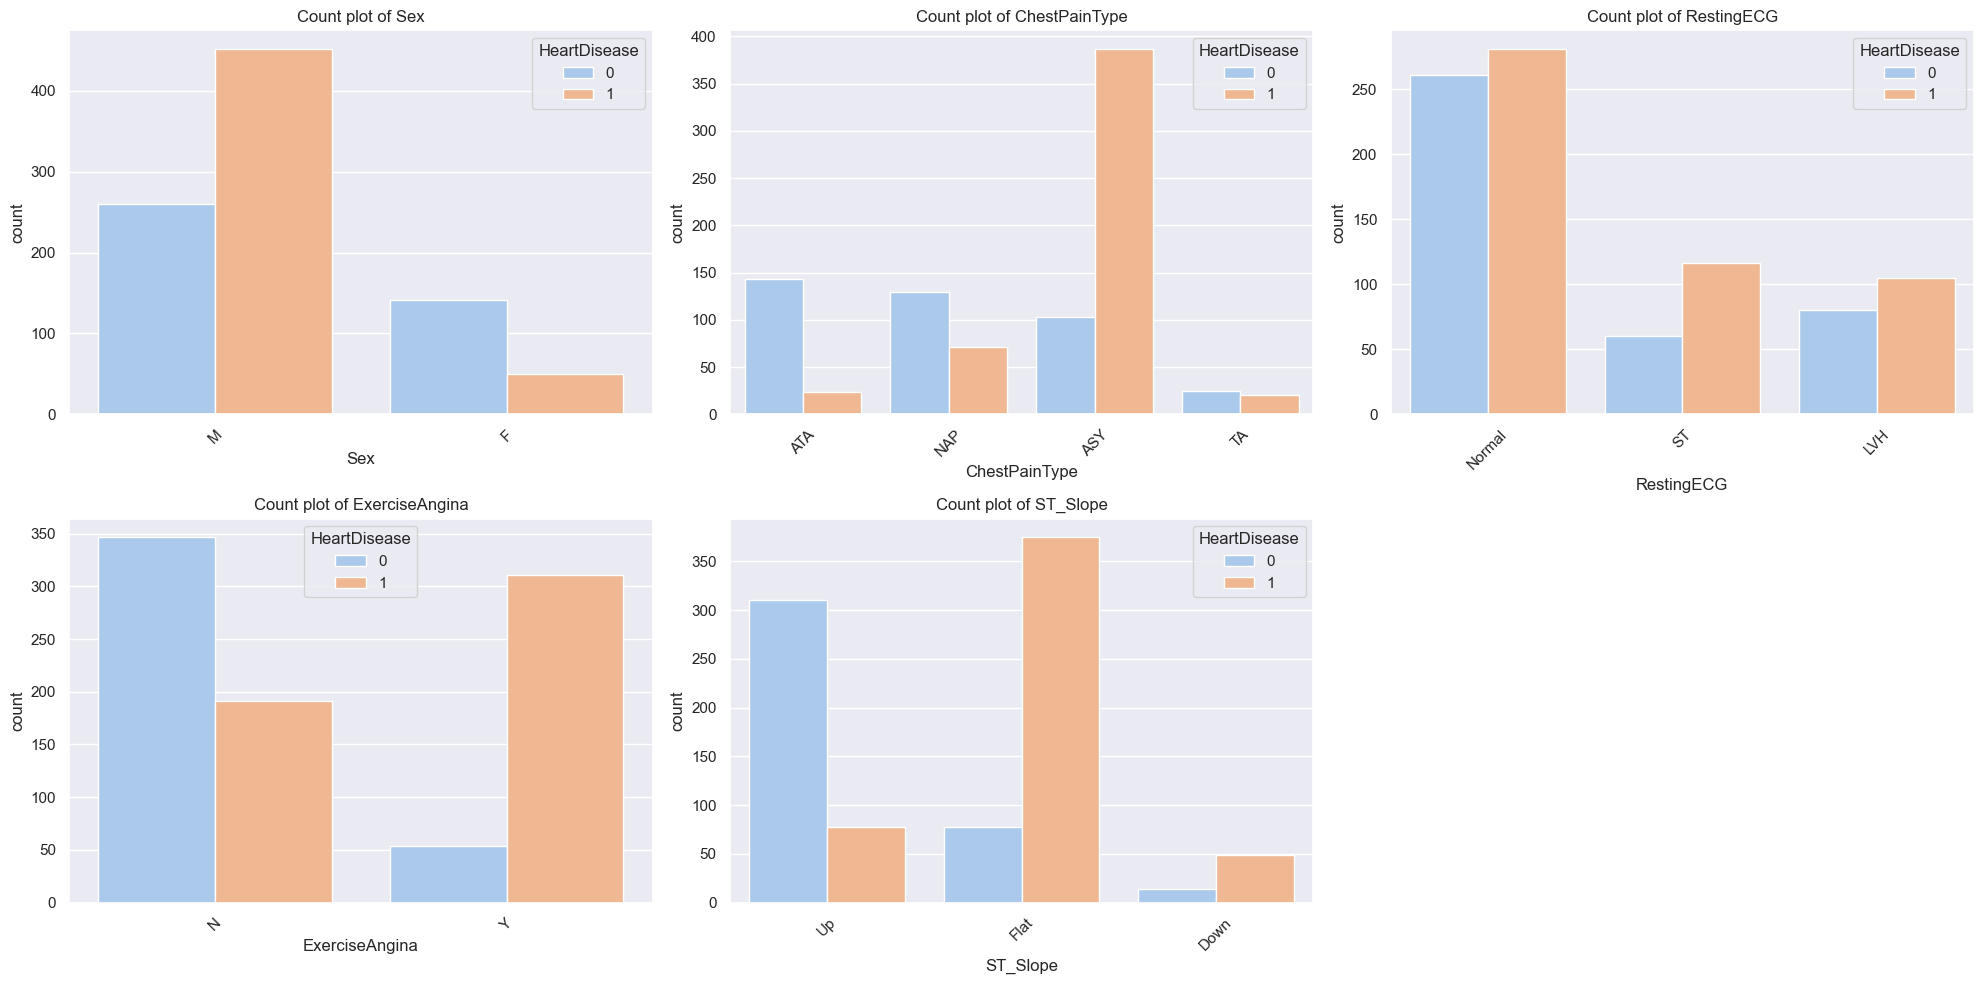

In [208]:
# The count plots show the distribution of each categorical feature with respect to the target variable (HeartDisease).
# This helps us to understand how each feature relates to the target variable and identify any potential correlations.
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_col):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df1, hue="HeartDisease", palette='pastel')
    plt.title(f'Count plot of {col}', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [209]:
# This line displays the data type of each column in the DataFrame.
# It's useful to confirm whether numeric and categorical columns are correctly interpreted before preprocessing or modeling.

df1.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# **Preprocessing**

In [210]:
# Convert categorical columns to numerical values using Label Encoding.
categorical_label = df1[['Sex','ExerciseAngina']].columns
label_encoder = LabelEncoder()
for col in categorical_label:
    df1[col] = label_encoder.fit_transform(df1[col])

In [211]:
# Convert categorical columns to numerical values using one-hot encoding.
categorical_OneHot = df1[['ChestPainType', 'RestingECG', 'ST_Slope']].columns
OneHot_encoder = OneHotEncoder(sparse_output=False)
OneHot_encoded = OneHot_encoder.fit_transform(df1[categorical_OneHot])
OneHot_encoded_df = pd.DataFrame(
    OneHot_encoded,
    columns=OneHot_encoder.get_feature_names_out(categorical_OneHot),
    index=df1.index)
df1 = pd.concat([df1.drop(categorical_OneHot, axis=1), OneHot_encoded_df], axis=1)

In [213]:
# display DataFrame after encoding
df1.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40.0,1,140.0,289.0,0,172.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49.0,0,160.0,180.0,0,156.0,0,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1,130.0,283.0,0,98.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48.0,0,138.0,214.0,0,108.0,1,1.5,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54.0,1,150.0,195.0,0,122.0,0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


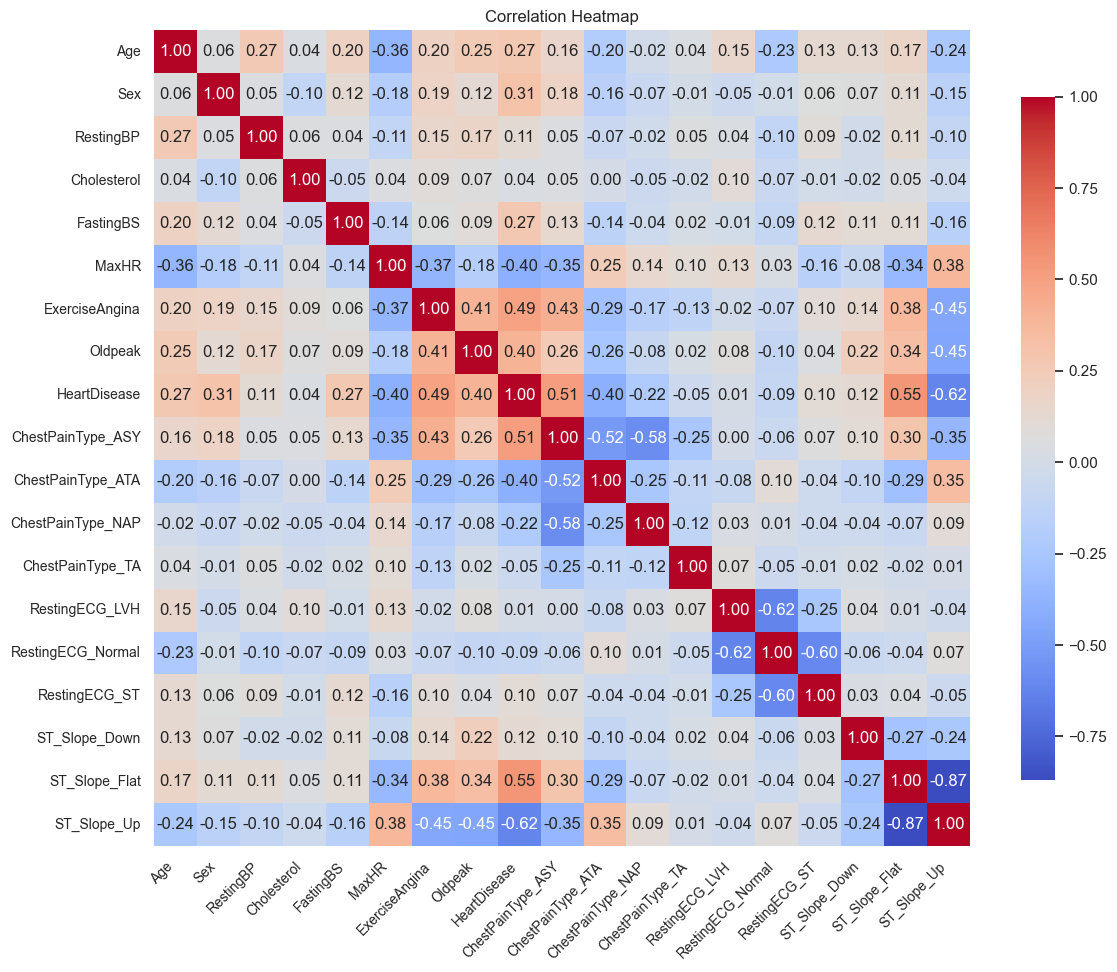

In [214]:
# heatmap to visualize the correlation between features after encoding.
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [215]:
# apply StandardScaler to scale the numerical columns.
numeric_col_scaled = df1[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].columns
scaler = StandardScaler()
df1[numeric_col_scaled] = scaler.fit_transform(df1[numeric_col_scaled])
df1.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.494467,1,0.572044,1.322087,0,1.386394,0,-0.869602,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.503407,0,1.854298,-1.181496,0,0.753095,0,0.179497,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.824821,1,-0.069083,1.184275,0,-1.542615,0,-0.869602,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.613525,0,0.443819,-0.400562,0,-1.146803,1,0.704046,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.047182,1,1.213171,-0.836967,0,-0.592666,0,-0.869602,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# **Modeling**

In [217]:
# Split the dataset into train and test data.
X = df1.drop('HeartDisease', axis=1)
y = df1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
# Define a function to evaluate the model's performance.
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} - Classification Report:")

    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    pd.options.display.float_format = '{:,.2f}'.format
    display(report_df)

    print("Confusion Matrix:")
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'],
                ax=ax)

    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Neural Network - Classification Report:


,precision,recall,f1-score,support
0,0.82,0.83,0.83,83.00
1,0.86,0.85,0.85,98.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.84,0.84,0.84,181.00
weighted avg,0.84,0.84,0.84,181.00


Confusion Matrix:


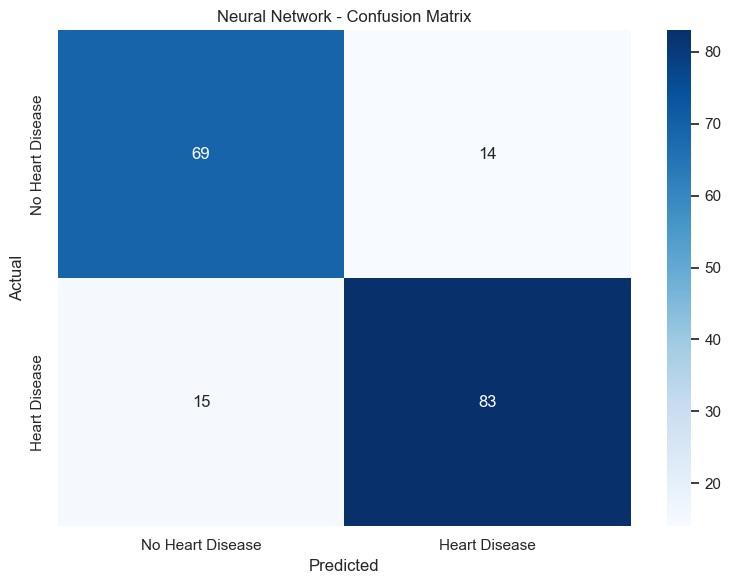

In [226]:
# Neural Network model
model = Sequential([
                Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                Dense(32, activation='relu'),
                Dense(16, activation='relu'),
                Dense(1, activation='sigmoid')
            ])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                                epochs=50, batch_size=32, verbose=0)

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
evaluate_model(y_test, y_pred_classes, "Neural Network")


Logistic Regression - Classification Report:


,precision,recall,f1-score,support
0,0.89,0.84,0.86,83.00
1,0.87,0.91,0.89,98.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.88,0.88,0.88,181.00
weighted avg,0.88,0.88,0.88,181.00


Confusion Matrix:


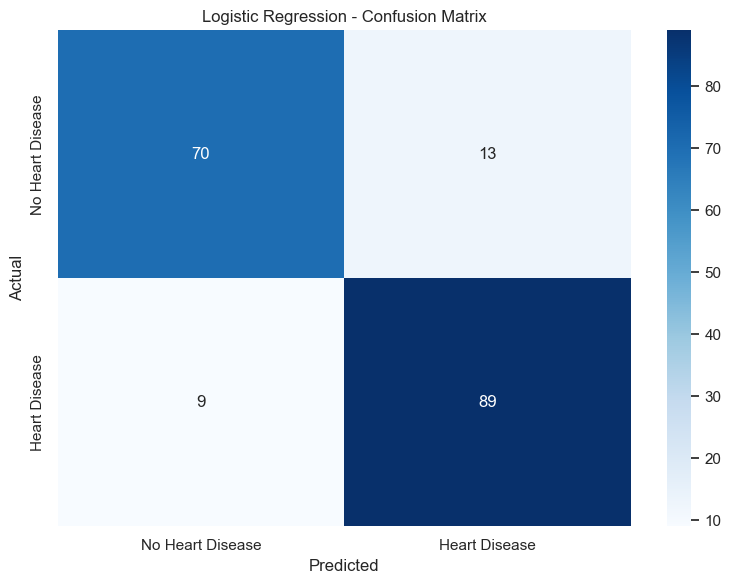

In [230]:
# logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")


Random Forest - Classification Report:


,precision,recall,f1-score,support
0,0.87,0.88,0.87,83.00
1,0.90,0.89,0.89,98.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.88,0.88,0.88,181.00
weighted avg,0.88,0.88,0.88,181.00


Confusion Matrix:


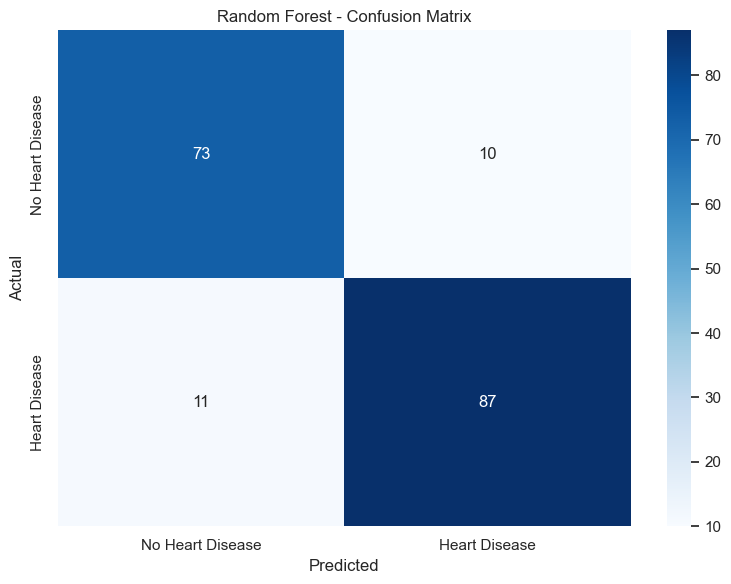

In [231]:
# Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
evaluate_model(y_test, y_pred_forest, "Random Forest")


XGBoost - Classification Report:


,precision,recall,f1-score,support
0,0.84,0.84,0.84,83.00
1,0.87,0.87,0.87,98.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.86,0.86,0.86,181.00
weighted avg,0.86,0.86,0.86,181.00


Confusion Matrix:


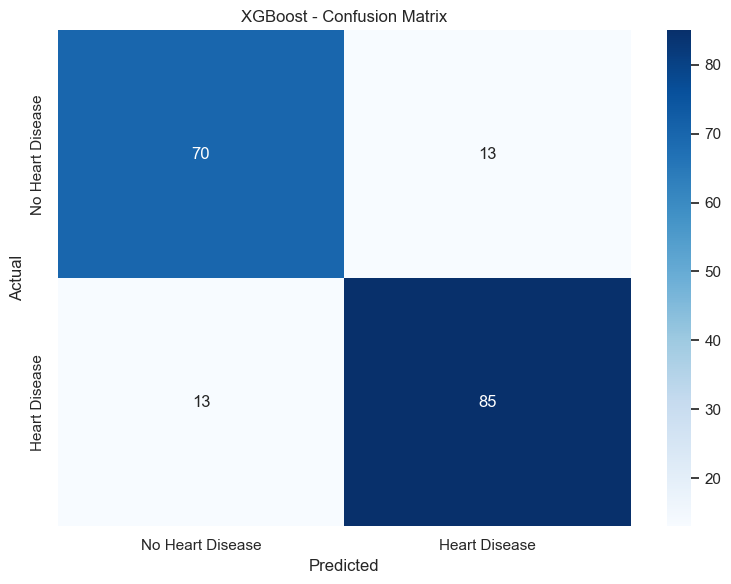

In [233]:
# XGBoost model
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)
evaluate_model(y_test, y_pred_xgboost, "XGBoost")